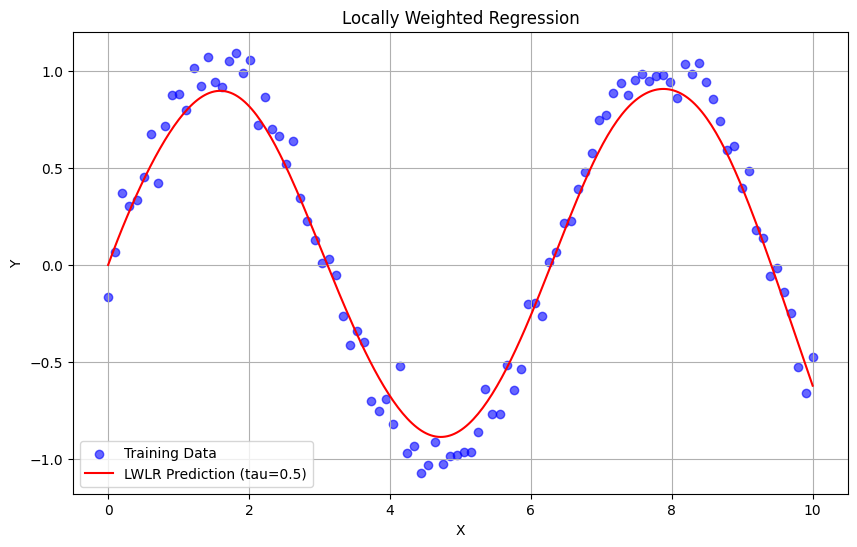

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    x = np.linspace(0, 10, 100)
    y = np.sin(x) + np.random.normal(0, 0.1, x.shape[0])
    return x.reshape(-1, 1), y

def add_bias(x):
    return np.hstack((np.ones((x.shape[0], 1)), x))

def compute_weights(X, x0, tau):
    m = X.shape[0]
    W = np.eye(m)
    for i in range(m):
        x1 = X[i]
        W[i, i] = np.exp(-np.sum((x1 - x0) ** 2) / (2 * tau ** 2))
    return W

def lwlr_predict(X, y, x0, tau):
    X_bias = add_bias(X)
    x0_bias = add_bias(x0.reshape(1, -1))
    W = compute_weights(X, x0, tau)
    theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y)
    return x0_bias @ theta

def plot_lwlr(X, y, tau):
    x_query = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    y_pred = np.array([lwlr_predict(X, y, x0, tau) for x0 in x_query])

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label="Training Data", color='blue', alpha=0.6)
    plt.plot(x_query, y_pred, label=f'LWLR Prediction (tau={tau})', color='red')
    plt.title("Locally Weighted Regression")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

X, y = generate_data()
plot_lwlr(X, y, tau=0.5)